In [1]:
from filter_forecast.particle_filter.parameters import ModelParameters
from filter_forecast.particle_filter.transition import (
    Transition,
    OUModel,
    GaussianNoiseModel,
)
from jax.random import PRNGKey
import jax.numpy as jnp

days = 200
beta = 0.2
pop = 100000
infected = 0.005 * pop
susceptible = pop - infected
initial_state = jnp.array([susceptible, infected, 0, 0, 0])
key = PRNGKey(0)

In [2]:
model_params = ModelParameters()

ou_model = OUModel(model_params)
gaussian_model = GaussianNoiseModel(model_params)

det_output = [initial_state.copy()]
ou_output = [initial_state.copy()]
gaussian_output = [initial_state.copy()]

In [3]:
def det_update(state):
    state += ou_model.det_component(state, 1, beta)
    return state

In [4]:
for i in range(1, days):
    det_output.append(det_update(det_output[-1]))

In [5]:
def update_state(state, model: Transition):
    state += model.det_component(state, 1, beta)
    state += model.sto_component(state, 1, key)
    return state

In [6]:
for i in range(1, days):
    ou_output.append(update_state(ou_output[i - 1], ou_model))

for i in range(1, days):
    gaussian_output.append(update_state(gaussian_output[i - 1], gaussian_model))

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def plot_output(output):
    data = np.array(output)
    labels = ["S", "I", "R", "H", "new_H"]
    # Create a plot for each variable
    plt.figure(figsize=(12, 6))

    for i in range(data.shape[1]):
        plt.plot(range(data.shape[0]), data[:, i], label=labels[i])

    plt.title("Time Dependent Variables")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend(title="Variables")
    plt.show()

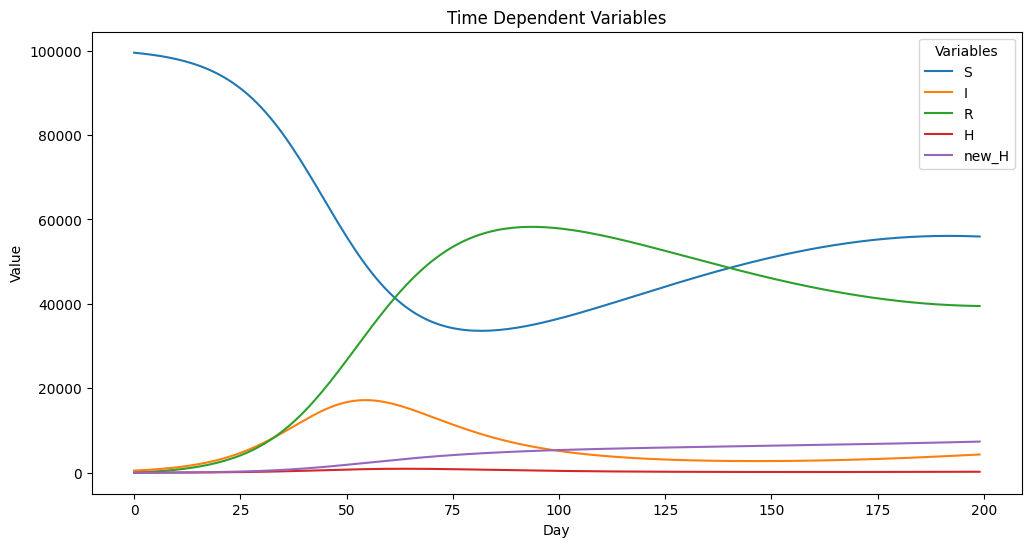

In [8]:
plot_output(det_output)

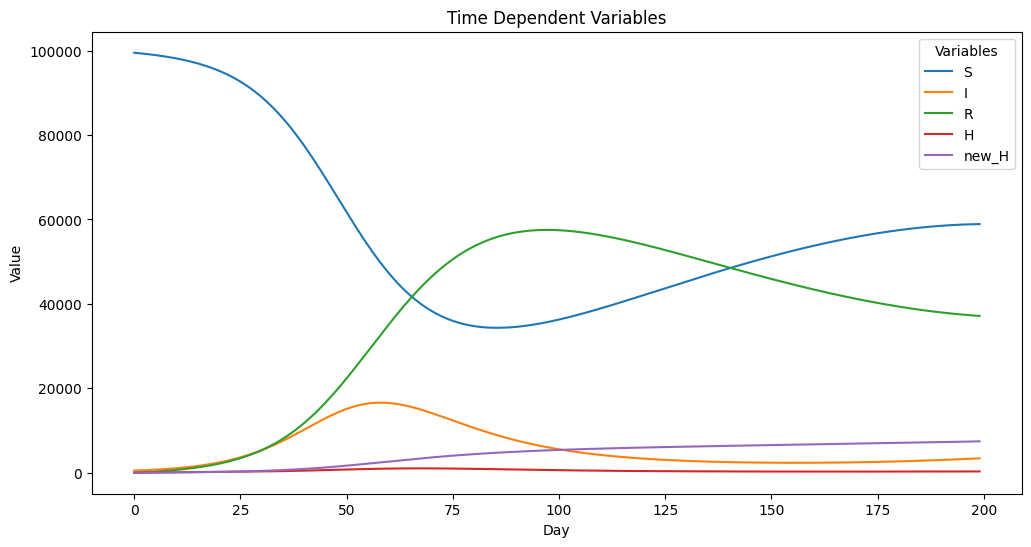

In [9]:
plot_output(gaussian_output)

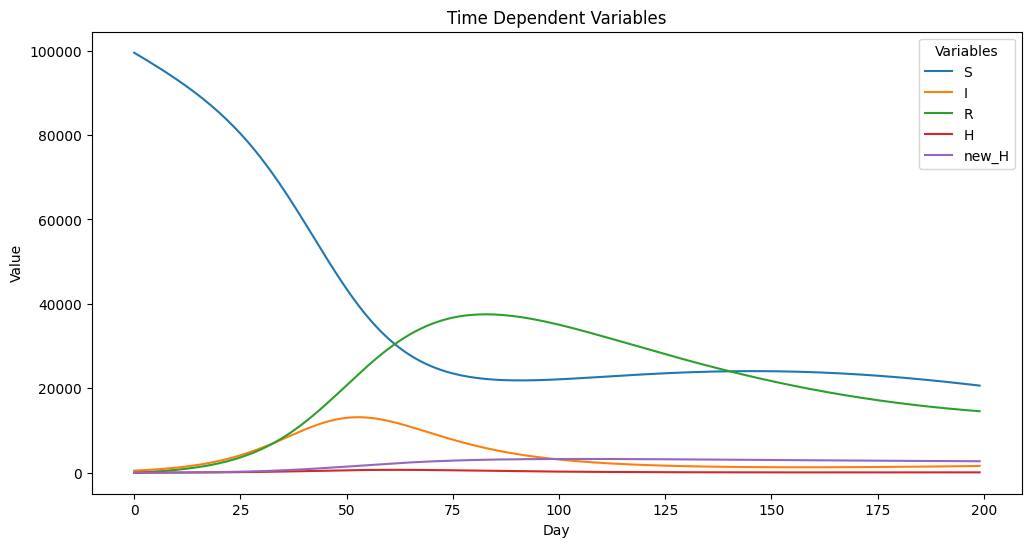

In [10]:
plot_output(ou_output)